# ECON627: Introduction to Julia & Markdown

## Paul Corcuera
### Jan 18 , 2021
****

## 1. Basic Markdown Syntax

****

- To render a markdown code we need to specify in the following part of the Jupyter notebook 

![img](https://www.earthdatascience.org/images/courses/earth-analytics/bootcamp/jupyter-interface/change-cell-type.png) 

- To write a title we use hastag (#) and a space before writing a title. The number of # you use should correspond to the heading size, which goes from 1 to 6. For instance, we can write Hello with different heading sizes as # Hello; ## Hello; etc. 

- The corresponding output is

# Hello
## Hello
### Hello
etc.

- To put a line break we only use two or more spaces before hitting the *Enter* button.   

- To create a new paragraph we just leave a blank line. 

- To create a horizontal rule to separate sections you can use three or more asterisks (\*\*\*), dashes (---), or underscores (\_\_\_) on a line by themselves. They all produce the same output.

- We can also use HTML syntax to center some text. For instance,

    <center>
    Hello
    </center>

    will produce the following output:

<center>
Hello 
</center>

- To denote a word or phrase as code, enclose it in backticks (\`). The output looks like this: `GMMreg`.

- To write math code we can use the dollar symbol, just as if we were in latex. If we use double dollar symbols we center an equation. The way we write the equations and greek letters works the same way as LaTeX code, i.e., to write $\beta$ we use backslash and the word beta. 

$$ y_i =  x_i \beta + \epsilon_i $$

- To write an indented block of text/code we can use the *TAB* button to indent a part of the text/code. 


    This is like a verbose mode, i.e.
    symbols such as < or \beta will not be 
    rendered as code.

- Alternatively, instead of indenting with *TAB* you can use triple backticks (\`) and write julia, to have an indented block interpreted as julia code. If you write \`\`\`julia and then close with \`\`\` your code shows up like this.

```julia
AKMreg(df::DataFrame, y::String, idvar::String, firmidvar::String)
```

  this is super useful if you want to explain what your function does!
   
- To display literal characters, like \`, you need to add a backslash (\\) before the symbol.

- This should be more than enough to be able to type the solutions to the problem sets in a Jupyter Notebook. You can explore more stuff by following [this link](https://www.markdownguide.org/basic-syntax/). 

- To export the notebook you can find the option *Export Notebook As* in the *File tab*, and you choose the option that says HTML. 

## 2. Julia Essentials

****

Julia has many of the standard primitive types. 

In [1]:
using Pkg
Pkg.activate(joinpath(pwd(),".."))

 Activating environment at `C:\Users\paulc\.julia\dev\ECON627_2020\Project.toml`


In [2]:
x = 1 #Int
y = 1.0 #Float
boolean = true
array = [1;2]
matrix = [1 2 3 ; 4 5 6]
tuple = ("hello", 3.5)

("hello", 3.5)

We can look at the type using the `typeof` function. 

In [3]:
typeof(array)

Array{Int64,1}

To supress output we can put a `;` after a line of code. 

In [4]:
x = 3.5; 

If we want to show different lines of code we can use the macro `@show`.

In [5]:
@show x + y 
@show matrix*matrix'

x + y = 4.5
matrix * matrix' = [14 32; 32 77]


2×2 Array{Int64,2}:
 14  32
 32  77

We can also use the `println()` function to print output.

In [6]:
println("The value of x is ", x)
println("The value of y is ", y)

The value of x is 3.5
The value of y is 1.0


In [7]:
println("We can also print in multiple\nlines of code.")

We can also print in multiple
lines of code.


#### Iterables

In [8]:
β = [3;4;5]
for i in β
   println(i)     
end

3
4
5


In [9]:
range_obj = 1:3
array_obj = collect(range_obj)
typeof(range_obj)

UnitRange{Int64}

We can also loop over Range objects.

In [10]:
for i in range_obj
    println(i)
end

1
2
3


In [11]:
for i in eachindex(array_obj)
    println("Element ",i," of array is: ", array_obj[i])
end

Element 1 of array is: 1
Element 2 of array is: 2
Element 3 of array is: 3


#### Indexing

It works pretty much the same way as Matlab.

In [12]:
array = [1; 2; 4 ; 5]
println("The last element is ", array[end])
println("The second element is ", array[2])

The last element is 5
The second element is 2


In [13]:
matrix = [1 2 3 ;4 5 6]

for row in 1:size(matrix,1)
    for col in 1:size(matrix,2)
        println("Element ($row,$col) is: ",matrix[row,col])
    end
end

Element (1,1) is: 1
Element (1,2) is: 2
Element (1,3) is: 3
Element (2,1) is: 4
Element (2,2) is: 5
Element (2,3) is: 6


#### Comprehensions

These are easy ways to create arrays without writing many lines of code.

In [14]:
array = [45; 32 ; 30 ; 85 ; 92]

#These are the indices that we want to use of the array
selection = [1;3;5]

array_subset = [ array[i] for i in selection]

3-element Array{Int64,1}:
 45
 30
 92

In [15]:
#Returns the indices that satisfy the condition
selection = findall(x-> x>=35, array)

array_subset2 = [array[x] for x in selection]

3-element Array{Int64,1}:
 45
 85
 92

In [16]:
doubles = [2*i for i in 1:3]

3-element Array{Int64,1}:
 2
 4
 6

In [17]:
matrix_comprehension = [ i+j for i in 1:3, j in 1:2 ]

3×2 Array{Int64,2}:
 2  3
 3  4
 4  5

Just as in Matlab we also have the functions `zeros()` and `ones()`.

In [18]:
zeros(3)

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

In [19]:
zeros(Int64,3)

3-element Array{Int64,1}:
 0
 0
 0

In [20]:
ones(5)

5-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0

#### Logical Operations

In [21]:
#This creates a global variable named x
x = 1 

1

In [22]:
#We can test if this is equal to a value
x == 2

false

In [23]:
x != 2

true

In [24]:
true && false

false

In [25]:
true || false

true

#### Functions in Julia

We can also perform something similar to the lambda functions in Matlab, and it's pretty straightforward.

In [26]:
func(x) = x^2

func (generic function with 1 method)

In [27]:
func(0.1)

0.010000000000000002

Alternatively, if the function is more complex, we can use the usual (and more verbose) way of defining functions.

In [28]:
function function2(x,y)
    return x+y
end

function2 (generic function with 1 method)

In [29]:
function2(1,3)

4

We can also broadcast a function to arrays, just like in Matlab, using a dot (.).

In [30]:
array = [1; 2 ; 3]
func.(array)

3-element Array{Int64,1}:
 1
 4
 9

#### Scoping & Closures

In general, sometimes we want to create an entire .jl file that contains functions to export (modules). In those cases, we have to be careful between the distinction of global vs local variables (scoping), and functions inside a functions become what is called a closure.

In [31]:
x = 0.1 #This is global
f(x) = x/2 #This x is local!

f(x) #Calls the function with the argument given by the global variable.

0.05

In [32]:
function h() # scope within the `h` function

    square(x) = x^2 # local `x` in scope

    # x is not bound to anything in this outer scope
    y = 5
    f(y) #By default Julia returns the last line inside the function
    #It is equivalent to writing return f(y)
end
h() 

2.5

In [33]:
function scalesquare(a)
    f(x) = a * x^2  # refers to the `a` passed in the function (closure!)
    return f(1)        
end
scalesquare(0.5)

0.5

#### Return Named Tuples in a Function

Sometimes we want to return many things from our function, and it is useful to name the different elements of the output so we can call them whenever we want.

In [34]:
function example(x,y)
    a = x+y
    b = x-y
    c = x*y
    return (s = a, dif = b, prod = c)
end

output = example(2,5)

(s = 7, dif = -3, prod = 10)

In [35]:
println("The sum is :",output.s,". The dif is: ",output.dif,".")

The sum is :7. The dif is: -3.


You can also use the Parameters package to unpack named tuples from a function. It creates objects with the same names as the named elements in the output.

In [36]:
using Parameters

@unpack s, dif, prod = example(2,5)

(s = 7, dif = -3, prod = 10)

In [37]:
s 

7

In [38]:
#It is equivalent to indexing, but if we index we need to know the position of the things we want!
println("The sum is :",output[1],". The dif is: ",output[2],".")

The sum is :7. The dif is: -3.


#### Optional Arguments

We include optional arguments in a function with the semi-colon (;). We must also set a default value for those arguments.

In [39]:
function example2(x ; y = 2)
    a = x+y
    b = x-y
    c = x*y
    return (s = a, dif = b, prod = c)
end

example2 (generic function with 1 method)

In [40]:
example2(1)

(s = 3, dif = -1, prod = 2)

In [41]:
example2(1, y = 5)

(s = 6, dif = -4, prod = 5)

#### Multiple Dispatch

One of the benefits of Julia is what is called multiple dispatch. Julia allows us to create different **methods** of the same function that work differently depending on the type of the arguments. For instance, if we are running OLS and we know that the design matrix (X) is very sparse we can leverage on this to construct a more efficient way to compute the vector of coefficients.

In [42]:
function somefunc(x::AbstractArray)
    return sum(x)
end


function somefunc(x::Real)
    return x 
end

methods(somefunc)

# 2 methods for generic function "somefunc":
[1] somefunc(x::AbstractArray) in Main at In[42]:1
[2] somefunc(x::Real) in Main at In[42]:6

In [43]:
#This calls the method that works on Range types
sum(1:3)
#This calls the method that works for Array types
println(sum([1.0;2.0;3.0]))

6.0


#### Installing Packages

You can install packages from the terminal that is being run in the Jupyter Notebook by calling the Pkg package.  Alternatively, you can open the Julia application, change to your workspace directory, and type `]` to enter in the Pkg mode, then just type `add PackageName` .

In [44]:
#using Pkg
#Pkg.add("Statistics") 
#Pkg.add("Distributions")
#Pkg.add("LinearAlgebra")

## 3. Putting Everything Together

****

In [45]:
using LinearAlgebra, Random, Distributions, Plots 

In [46]:
#Set the seed (Important for replicating your code!)
Random.seed!(1234) ;

Suppose we want to simulate data that follows this GDP 

$$ y_i = \beta X_i  + \varepsilon_i $$

where 

$\beta \equiv  \left[ \begin{array}{c}  \beta_1 \\ \beta_2 \end{array} \right] = \left[ \begin{array}{c}  1.0 \\ -1.0 \end{array} \right]$ , $\quad X_i \sim N\big( \left[ \begin{array}{c}  1.0 \\ 2.0 \end{array} \right], \left[ \begin{array}{c}  1.0 & \rho\\ \rho & 1.0 \end{array} \right] \big) $, and  $\varepsilon_i \sim N(0,1)$.


We want to compute average coverage of the confidence intervals of $\beta_1$. The parameters should be set to $n = 1000$ observations, $R=500$ repetitions, and $\rho = 0.9$. 

In [47]:
#Set constant number of repetition (I recommend using this when you need to set a global that won't be modified later on)
const Reps = 500
const β1 = 1.0 ;

In [48]:
function gen_data(n= 1000, β = [1.0; -1.0] , ρ = 0.9)
    """
    n:= sample size
    β:= true beta
    ρ:= correlation coefficient
    """

    #Define the Multivariate Normal Distribution instance
    mvnormal = MvNormal([1.0; 2.0], [1 ρ; ρ 1]);
    
    #Matrix X (n x 2 ) and ε (n x 1)
    X = rand(mvnormal,n)'
    ε = randn(n, 1)
    
    #Vector y
    y = X*β + ε
        
    #Return the data
    return (X = X , y = y)
end   

gen_data (generic function with 4 methods)

In [49]:
#The @with_kw allows to set default values inside a struct
@with_kw struct LMSettings
    variance_type::String = "White"
    compute_ci::Bool = true
    α::Real = 0.05
end

LMSettings

In [50]:
LMSettings()

LMSettings
  variance_type: String "White"
  compute_ci: Bool true
  α: Float64 0.05


In [51]:
LMSettings(variance_type = "Default", compute_ci =false)

LMSettings
  variance_type: String "Default"
  compute_ci: Bool false
  α: Float64 0.05


In [52]:
function ols(x,y; settings = LMSettings() )
    #Extract sample size
    n = size(x, 1)

    #Estimate the model
    xx = x'*x
    xy = x'*y
    βhat = xx\xy
    
    res = y - x * βhat
    
    #Step 2: Compute Avar
    if settings.variance_type == "Default"
        avar = (res' * res) ./ xx 
        se = sqrt.(diag(avar))
        
    elseif settings.variance_type == "White"
        xr = x .* res 
        avar = n\(xx \ (xr' * xr) / xx)
        se = sqrt.(diag(avar))
        
    else
        error("Incorrect variance type in the settings.")
    end
    
    #Step 3: Compute Confidence Intervals
    if settings.compute_ci == true         
        ci_lower = quantile(Normal(), settings.α / 2) .* se * sqrt(n) .+ βhat;
        ci_upper = quantile(Normal(), 1 - settings.α / 2) .* se * sqrt(n) .+ βhat
        
    else 
        ci_lower = nothing
        ci_upper = nothing 
        
    end
    
    return (coef = βhat, se = se, ci_upper = ci_upper , ci_lower = ci_lower )
end

ols (generic function with 1 method)

In [53]:
#Create Matrix to store results
InsideCI = zeros(Reps,1)
Coeficients = zeros(Reps,2)

for i=1:Reps

    #Simulating Data
    X,y = gen_data()

    #Computing coefficients
    @unpack coef , se , ci_upper  , ci_lower  = ols(X,y);

    #Coverage Results
    InsideCI[i] = ci_upper[1] > β1 && ci_lower[1] < β1 ? 1.0 : 0.0
    Coeficients[i,:] = coef
   
end

Coverage = mean(InsideCI, dims=1);
println("Average Coverage = ", Coverage[1])



Average Coverage = 0.952


We can also plot the distribution of $\beta_1$ and $\beta_2$ across simulations.

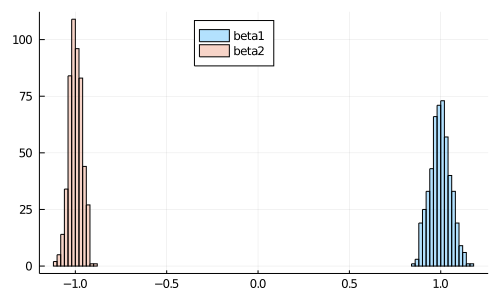

In [54]:
histogram( [Coeficients[:,1] Coeficients[:,2]], label=["beta1" "beta2"],
    size = (500, 300), fmt = :png, legend=:top, fillalpha=0.3)

## 4. (Optional) More Advanced Stuff

****
Usually our moment conditions leave us with something that looks like a linear system of equations.  For instance, in the case of OLS we have the following system: 

$$ X'X * \beta  = X'Y $$

which can be rewritten as 

$$ A x  = b $$ 


We say a matrix is **ill-conditioned** if the basis of eigenvectors are close to, but not exactly, collinear. This can create numerical errors roughly in proportion to the base-10 log of the condition number. I don't think this is gonna be an issue in any of the computations you will perform in the course, but these type of issues can arise when we are, for instance, running models with many fixed effects (high dimensional FE). 


The condition number (using the 2-norm) can be computed as 

$$ k(A) = || A || * || A^{-1} || $$


In [55]:
#Create ill-conditioned matrix
ϵ = 1E-6
A = [1.0 0.0
     1.0 ϵ]
cond(A)

2.0000000000005004e6

In [56]:
#Notice that it has both huge and tiny values!
inv(A)

2×2 Array{Float64,2}:
  1.0    0.0
 -1.0e6  1.0e6

This is actually one of the reasons to avoid using `inv()` in practice, and instead use the backslash notation, which will perform better. Another reason is that if the A matrix is sparse, we make it dense when we invert it. The backslash notation will exploit the fact that A was sparse in the first place!

### Factorization

One way to fix this is to do a factorization, which will allow us to compute a more stable inverse (like a triangular matrix). For instance, a QR decomposition splits A into an orthogonal matrix (inverse = transpose) and an upper triangular matrix. The solution is then simplified as

$$ Q R x  = b $$ 
$$ R x  = Q^{T} * b $$
$$ x = R^{-1}  Q^{T} * b $$

In [57]:
illX = [ones(1000)'; ϵ * I]'
illXX = illX'illX;
illXY = illX' * rand(1000,1);

Q, R = qr(illXX);
βsol_qr = R \ (Q'* illXY)


1001×1 Array{Float64,2}:
       0.46145411636115213
 -233036.00480237874
   73466.8477924236
  475731.83252828807
   16629.059291967813
  156531.67028261715
  -90632.28476431432
  396946.4577618547
 -158857.43380003513
  156086.41849524397
  -98976.12500698051
  297827.4163008304
 -441649.3853068084
       ⋮
 -325442.7576607108
 -370731.92008147977
   -6781.2592617338505
  -80607.36259316909
  239472.67590391356
  259623.3162518157
  350883.6386493752
   98613.43514630072
  498327.8684428162
 -287499.4664745022
    8321.89296378373
  466568.22018348624

In [58]:
cond(illXX)

3.229517786600101e29

In [59]:
cond(R)

2.873181747420282e30

In [60]:
cond(R) > cond(illXX)

true

Depending on the particular application and the factorization chosen we can improve a lot the conditioning number.

### Iterative Solution (Krylov Methods)

This is will iterate the system on $x^k$ until it reaches a solution. It is an alternative to factorization. However, it has slow convergence rates when the matrix in the linear system is ill-conditioned. 

A solution to this is to set a matrix $ P $ which has numerically stable inverse. Consider the following case of a right preconditioner P:

$$ A x = b $$
$$ A P^{-1} P  x = b $$
$$ (AP^{-1}) y = b $$ 

so we can use the last equation to solve for $y$ , and then recover $x$ from $P x = y $. 

In [61]:
#This creates a sparse matrix with 10% of zeros
using SparseArrays
A = sprand(100, 100, 0.1)   
A = A * A'  
cond(Matrix(A)) #Can be ill conditioned!

1.0703458981179625e6

One of the standard Krylov methods is Conjugate Gradient, which works for symmetric and positive definite matrices. This is exactly the case of our least squares problem!

We can choose among many preconditioners, and there's no really a way to know which is gonna work the best. In this case I'll show the solution using an Algebraic Multigrid (AMG) preconditioner.

In [62]:
#Pkg.add("IterativeSolvers")
#Pkg.add("AlgebraicMultigrid")
using IterativeSolvers, AlgebraicMultigrid

In [63]:
#Initial value
β_init = zeros(100)
b = A * rand(100,1)
P = aspreconditioner(ruge_stuben(A))
sol = cg!(β_init, A, b, Pl = P, log=true, maxiter = 1000)
sol[end]

Converged after 59 iterations.

In [64]:
#Show the vector of coefficients
sol[1]

100-element Array{Float64,1}:
 0.6901488231693906
 0.7565708220183458
 0.6963497871684824
 0.5734265679332653
 0.6231229993312912
 0.43500680522677826
 0.7771934733486723
 0.8803706004151267
 0.7788596512729516
 0.6743031851916553
 0.496961650411733
 0.6166383981759211
 0.2800066166910914
 ⋮
 0.03204514975910175
 0.8220604427401073
 0.9170283208283931
 0.4517359019125567
 0.5713645111653427
 0.772627925019254
 0.7444510173505934
 0.7870611921790308
 0.8438634302388455
 0.7754721050172753
 0.6072224730333629
 0.37425732011522933

Something I would like to point out is that using a preconditioner does not ensure that the number of iterations will reduce.